In [2]:
import pyvista as pv
import os

In [8]:
source_dir = r'H:\DDGAN\107'
target_dir = r'H:\DDGAN\dataset_v'
os.makedirs(target_dir, exist_ok=True)

In [ ]:
z_height = 1.5
initial_offset = 719
for idx, filename in enumerate(sorted(os.listdir(source_dir))):
    if filename.startswith('107_') and filename.endswith('.vtk'):
        file_path = os.path.join(source_dir, filename)
        data = pv.read(file_path)
        slice = data.slice(normal='z', origin=(0, 0, z_height))
        v = slice.point_data['v'] 
        output_data = pv.UnstructuredGrid(slice) 
        output_data.point_data.clear()
        output_data.point_data['v'] = v
        new_filename = f'v_{initial_offset + idx}.vtk'
        output_path = os.path.join(target_dir, new_filename)
        output_data.save(output_path)
        print(f"{output_path}")
print("DONE")

In [6]:
import pyvista as pv

vtk_file_path_u = r'H:\DDGAN\u_0.vtk'  # Update this path
vtk_file_path_v = r'H:\DDGAN\v_0.vtk'  # Update this path
output_vtk_file_path = r'H:\DDGAN\uv_0.vtk'  # Update this path

data_u = pv.read(vtk_file_path_u)
data_v = pv.read(vtk_file_path_v)

# Extract the 'u' and 'v' data components
u_data = data_u.point_data['u']
v_data = data_v.point_data['v']

# Create a new VTK object to store combined data
merged_data = data_u.copy()
merged_data.point_data['u'] = u_data
merged_data.point_data['v'] = v_data 

merged_data.save(output_vtk_file_path)

In [3]:
source_dir_u = r'H:\DDGAN\dataset_u'
source_dir_v = r'H:\DDGAN\dataset_v'
target_dir = r'H:\DDGAN\dataset_uv'
os.makedirs(target_dir, exist_ok=True)

In [ ]:
import pyvista as pv
import numpy as np

vtk_file_path = r'H:\DDGAN\uv_0.vtk'  # Update this path
data = pv.read(vtk_file_path)

# Ensure 'u' and 'v' are present
if 'u' in data.point_data and 'v' in data.point_data:
    # Calculate the velocity magnitude for visualization
    u_data = data.point_data['u']
    v_data = data.point_data['v']
    velocity_magnitude = np.sqrt(u_data**2 + v_data**2)
    data.point_data['velocity_magnitude'] = velocity_magnitude

    vectors = np.stack((u_data, v_data, np.zeros_like(u_data)), axis=1)  
    data.point_data['vectors'] = vectors

    plotter = pv.Plotter()

    # Add the mesh and scalar bar for the velocity magnitude
    plotter.add_mesh(data, scalars='velocity_magnitude', cmap='viridis', clim=[velocity_magnitude.min(), velocity_magnitude.max()])
    plotter.add_scalar_bar(title='Velocity Magnitude', vertical=True)

    # Generate a glyph plot to show the vector field
    glyphs = data.glyph(orient='vectors', scale='velocity_magnitude', factor=0.01)
    plotter.add_mesh(glyphs, color='black', label='Velocity Field')

    plotter.show()
else:
    print("Error: 'u' and 'v' data not found in the file.")


In [ ]:
import pyvista as pv
import os

# Define the directories
u_dir = r'H:\DDGAN\dataset_u'
v_dir = r'H:\DDGAN\dataset_v'
output_dir = r'H:\DDGAN\dataset_uv'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get a list of file names from one directory (assuming naming convention is consistent across both)
file_names = sorted(f for f in os.listdir(u_dir) if f.startswith('u_') and f.endswith('.vtk'))

# Iterate over the sorted list of file names
for file_name in file_names:
    time_step = file_name.split('_')[-1]  # Extract the time step from the file name
    u_file_path = os.path.join(u_dir, f'u_{time_step}')
    v_file_path = os.path.join(v_dir, f'v_{time_step}')
    output_file_path = os.path.join(output_dir, f'uv_{time_step.replace(".vtk", ".vtu")}')

    # Read the u and v files
    u_data = pv.read(u_file_path)
    v_data = pv.read(v_file_path)

    # Ensure both files are loaded
    if 'u' in u_data.point_data and 'v' in v_data.point_data:
        # Combine the data into one dataset (assuming both have the same points/mesh)
        combined_data = u_data.copy()
        combined_data.point_data['u'] = u_data.point_data['u']
        combined_data.point_data['v'] = v_data.point_data['v']

        # Save the combined data as a VTU file
        combined_data.save(output_file_path)
        print(f"Combined file saved as {output_file_path}")
    else:
        print(f"Failed to find 'u' or 'v' in the datasets for {time_step}")


In [ ]:
import pyvista as pv
import os

# Define the directory where the VTU files are stored
output_dir = r'H:\DDGAN\dataset_uv'

# Get a list of .vtu files in the directory
vtu_files = [f for f in os.listdir(output_dir) if f.endswith('.vtu')]

# Process each file to read and display mesh and data properties
for vtu_file in vtu_files:
    file_path = os.path.join(output_dir, vtu_file)
    data = pv.read(file_path)

    # Check if 'u' and 'v' are present in the file
    if 'u' in data.point_data and 'v' in data.point_data:
        u_data = data.point_data['u']
        v_data = data.point_data['v']

        # Print the size or dimensions of the 'u' and 'v' arrays and the number of points in the mesh
        print(f"File: {vtu_file}")
        print(f"  Number of Points: {data.n_points}")
        print(f"  Number of Cells: {data.n_cells}")
        print(f"  'u' dimensions: {u_data.shape}")
        print(f"  'v' dimensions: {v_data.shape}")
    else:
        print(f"Data for 'u' or 'v' not found in {vtu_file}")

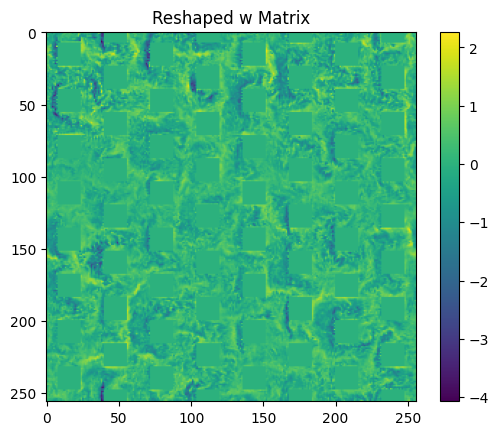

In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

# Path to the VTK file
vtk_file_path = r"H:/DDGAN/dataset_w/w_0.vtk"

# Path where the numpy file will be saved
output_npy_path = r"H:/DDGAN/DD_test/w_0_matrix.npy"

# Load the VTK file
mesh = pv.read(vtk_file_path)

# Assuming 'w' data is stored as point data in the VTK file
w_data = mesh.point_data['w']  # Adjust 'w' as per your data structure

# Reshape the data into 256x256 grid
w_matrix = w_data.reshape(256, 256)

# Save the reshaped matrix as a numpy file
np.save(output_npy_path, w_matrix)

# Plotting the reshaped matrix
plt.imshow(w_matrix, cmap='viridis')
plt.colorbar()
plt.title('Reshaped w Matrix')
plt.show()
